<a href="https://colab.research.google.com/github/datajcthemax/gitproject/blob/main/day21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21번째 이야기
- XGBoost와 LightGBM
- 하이퍼파라미터 튜닝
- 깃팀플 협업

In [2]:
import pandas as pd
PATH = '/content/drive/MyDrive/datas/따릉이/train.csv'
data = pd.read_csv(PATH)

In [3]:
# 전처리
# 모델
# 학습
# 성능평가
# 하이퍼파라미터 튜닝

In [4]:
data.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
y = data.pop('count')
X = data

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
scaler.fit(X)
X = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## XGBoost
## LightGBM

In [10]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [11]:
def say_hello():
  print('Hello')

In [12]:
def many_work(callback):
  print('do something')
  callback()
  print('do something again')

In [13]:
many_work(callback=say_hello)

do something
Hello
do something again


In [14]:
def makegraph():
  print('Make Graph')

In [15]:
def xgb_fit(callbacks=[]):
  print("machine learning")
  for callback in callbacks:
    callback()
  print("machine learning again")

In [16]:
xgb_fit(callbacks=[makegraph])

machine learning
Make Graph
machine learning again


In [17]:
# 성능측정
pred = xgb_model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7668150265633096

# LightGBM

In [19]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()

In [20]:
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [21]:
pred = lgb_model.predict(X_test)

In [22]:
r2_score(y_test, pred)

0.7548552258271208

In [23]:
lgb_model.feature_importances_

array([366, 447, 429,  23, 238, 302, 246, 338, 340, 271], dtype=int32)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'id'),
  Text(1, 0, 'hour'),
  Text(2, 0, 'hour_bef_temperature'),
  Text(3, 0, 'hour_bef_precipitation'),
  Text(4, 0, 'hour_bef_windspeed'),
  Text(5, 0, 'hour_bef_humidity'),
  Text(6, 0, 'hour_bef_visibility'),
  Text(7, 0, 'hour_bef_ozone'),
  Text(8, 0, 'hour_bef_pm10'),
  Text(9, 0, 'hour_bef_pm2.5')])

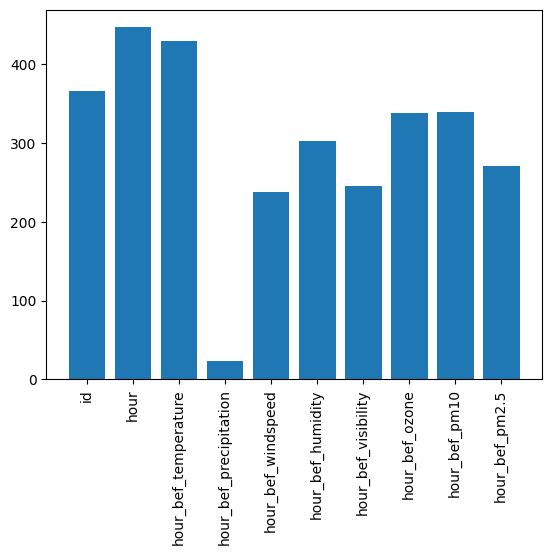

In [24]:
from numpy import rot90
import matplotlib.pyplot as plt
plt.bar(data.columns, lgb_model.feature_importances_)
plt.xticks(rotation=90)